# The use of axes

Axes are a great option to add at the scenario declaration in order to make a variable v evolves in a given interval.

We'll show this opportunity with the illustration of the evolution of average rate and marginal rate of the French Income Tax

#### Initialisation

We import essential modules and initialize the tax and benefit system


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from openfisca_france import FranceTaxBenefitSystem   
tax_benefit_system = FranceTaxBenefitSystem()  # Create an instance of French Tax and Benefit system

## Income Tax Concavity : a progressive system ?

Let's observe how to declare a scenario  with an income evolving between 0 euros and 100000 euros per year.

In [3]:
scenario = tax_benefit_system.new_scenario()

scenario.init_single_entity(
    
    # Axe declaration
    axes = [
        dict(                       #  in a dictionary
            count = 100,            # 'count' : indicates the number of step
            min = 0,
            max = 100000,
            name = 'salaire_de_base', # the variable you want to make evolve
            ),
        ],
    
    
    period = 2014,
     parent1 = dict(
        date_naissance = '1980-01-01',
         )
    )

simulation = scenario.new_simulation()

In [4]:
simulation.calculate('salaire_de_base', 2014)

array([      0.        ,    1010.10101318,    2020.20202637,
          3030.30297852,    4040.40405273,    5050.50488281,
          6060.60595703,    7070.70703125,    8080.80810547,
          9090.90917969,   10101.00976562,   11111.11132812,
         12121.21191406,   13131.31347656,   14141.4140625 ,
         15151.515625  ,   16161.61621094,   17171.71679688,
         18181.81835938,   19191.91992188,   20202.01953125,
         21212.12109375,   22222.22265625,   23232.32226562,
         24242.42382812,   25252.52539062,   26262.62695312,
         27272.7265625 ,   28282.828125  ,   29292.9296875 ,
         30303.03125   ,   31313.13085938,   32323.23242188,
         33333.33203125,   34343.43359375,   35353.53515625,
         36363.63671875,   37373.73828125,   38383.83984375,
         39393.9375    ,   40404.0390625 ,   41414.140625  ,
         42424.2421875 ,   43434.34375   ,   44444.4453125 ,
         45454.546875  ,   46464.64453125,   47474.74609375,
         48484.84765625,

In [5]:
income_tax = - simulation.calculate('irpp', 2014)
gross_wage = simulation.calculate('salaire_de_base', 2014)

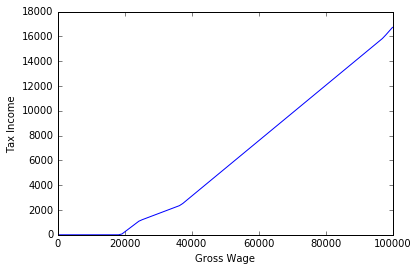

In [6]:
plt.plot(gross_wage,income_tax)
plt.ylabel(u"Tax Income")
plt.xlabel(u"Gross Wage")

**NB** : The Income Tax is flat in opposite to common opinion.

## Average rate

In [7]:
average_rate = income_tax / gross_wage  

/home/edarin/.virtualenvs/openfisca/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


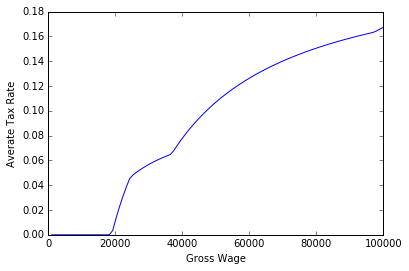

In [8]:
plt.plot(gross_wage, average_rate)
plt.ylabel("Averate Tax Rate")
plt.xlabel("Gross Wage")

## Marginal rate

In [9]:
marginal_rate =  (income_tax[:-1] - income_tax[1:]) / (gross_wage[:-1] - gross_wage[1:] ) 

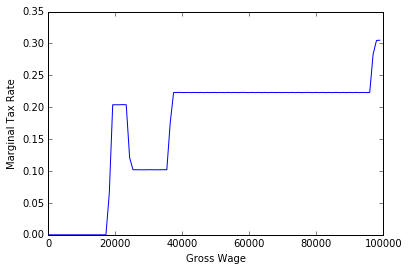

In [10]:
plt.plot(gross_wage[:-1], marginal_rate)
plt.ylabel("Marginal Tax Rate")
plt.xlabel("Gross Wage")

In [11]:
marginal_rate[40], marginal_rate[95]

(0.22296934, 0.22327389)

We can see the step in the French Tax scale of 14% and 30%

### Notice :  dedicated fonctions in OpenFisca

Marginal and Average rate exist as functions implemented in OpenFisca. You can apply them on several income concept

In [12]:
from openfisca_core.rates import average_rate, marginal_rate

In [14]:
csg = simulation.calculate('csg')
csg

array([    0.        ,   -74.43458557,  -148.8601532 ,  -223.29470825,
        -297.72930908,  -372.15487671,  -446.5894165 ,  -521.02398682,
        -595.45861816,  -669.88427734,  -744.31872559,  -818.7532959 ,
        -893.17883301,  -967.61346436, -1042.04797363, -1116.47363281,
       -1190.9083252 , -1265.34277344, -1339.76855469, -1414.20300293,
       -1488.63745117, -1563.07202148, -1637.49780273, -1711.93237305,
       -1786.36694336, -1860.79248047, -1935.22692871, -2009.66174316,
       -2084.0871582 , -2158.52172852, -2232.95654297, -2307.38134766,
       -2381.81665039, -2456.25048828, -2530.68554688, -2605.11083984,
       -2679.5456543 , -2753.98022461, -2828.40600586, -2902.84008789,
       -2977.27490234, -3051.70068359, -3126.13525391, -3200.56982422,
       -3275.00439453, -3349.43017578, -3423.86474609, -3498.29882812,
       -3572.72412109, -3647.15917969, -3721.59423828, -3796.01904297,
       -3870.45385742, -3944.88867188, -4019.31445312, -4093.74829102,
      

In [15]:
1 - average_rate(-csg[1:], gross_wage[1:])

array([ 0.07369024,  0.07368577,  0.07368726,  0.07368803,  0.07368666,
        0.07368726,  0.07368767,  0.07368803,  0.07368726,  0.07368755,
        0.07368779,  0.07368726,  0.07368749,  0.07368767,  0.07368726,
        0.07368743,  0.07368761,  0.07368726,  0.07368743,  0.07368755,
        0.07368767,  0.07368737,  0.07368755,  0.07368761,  0.07368737,
        0.07368749,  0.07368761,  0.07368737,  0.07368743,  0.07368755,
        0.07368731,  0.07368743,  0.07368749,  0.07368761,  0.07368743,
        0.07368749,  0.07368755,  0.07368743,  0.07368749,  0.07368755,
        0.07368743,  0.07368749,  0.07368755,  0.07368761,  0.07368743,
        0.07368755,  0.07368755,  0.07368743,  0.07368749,  0.07368755,
        0.07368743,  0.07368749,  0.07368755,  0.07368743,  0.07368749,
        0.07368755,  0.07368755,  0.07368743,  0.07368749,  0.07368755,
        0.07368749,  0.07368749,  0.07368755,  0.07368743,  0.07368749,
        0.07368749,  0.07368743,  0.07368749,  0.07368755,  0.07

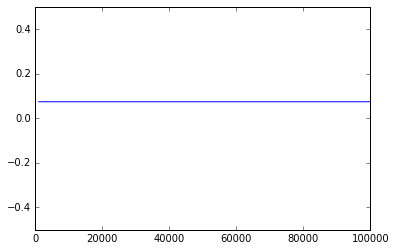

In [16]:
plt.ylim(-0.5,0.5)
plt.plot(gross_wage[1:], 1-average_rate(-csg[1:], gross_wage[1:]))

(-0.5, 0.5)

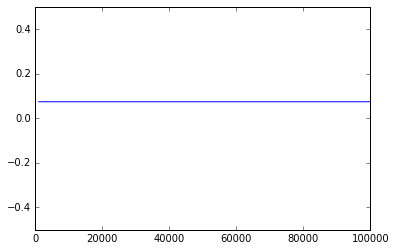

In [17]:
plt.plot(gross_wage[1:], 1 - marginal_rate(-csg, gross_wage))
plt.ylim(-0.5,0.5)